In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from scipy.stats import gaussian_kde
from scipy.stats import norm, t
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

ds = pd.read_csv("C:\\Users\\Muzzammil Mohammed\\OneDrive\\Desktop\\VOO Stock Data.csv")

In [2]:
ds.columns = ds.columns.str.strip()
ds = ds[::-1].reset_index(drop=True)

#current exchange rate from dollars to rands is 18.57
exchange_rate = 18.57
ds['Close'] = ds['Close'] * exchange_rate
ds['Open'] = ds['Open'] * exchange_rate
ds['High'] = ds['High'] * exchange_rate
ds['Low'] = ds['Low'] * exchange_rate

ds['Date'] = pd.to_datetime(ds['Date'], format='%m/%d/%y')

ds['Year'] = ds['Date'].dt.year

ds['Daily_Close_Increase'] = ds['Close'] - ds['Open']

dataList = ds['Close'].tolist()
dataList.sort()
ds

,Date,Open,High,Low,Close,Volume,Year,Daily_Close_Increase
0,2010-09-09,1903.4250,1903.425000,1878.16980,1881.51240,26513.0,2010,-21.91260
1,2010-09-10,1888.1976,1891.540200,1881.06672,1890.05460,8638.0,2010,1.85700
2,2010-09-13,1911.9672,1915.309800,1903.42500,1913.82420,33752.5,2010,1.85700
3,2010-09-14,1909.7388,1921.623600,1901.19660,1913.41566,59420.0,2010,3.67686
4,2010-09-15,1905.6534,1919.766600,1901.56800,1918.28100,9283.0,2010,12.62760
...,...,...,...,...,...,...,...,...
3309,2023-11-01,7151.1213,7225.215600,7142.39340,7212.58800,5549159.0,2023,61.46670
3310,2023-11-02,7278.1401,7352.041272,7277.95440,7349.63460,4752164.0,2023,71.49450
3311,2023-11-03,7389.3744,7443.784500,7387.88880,7417.60080,5981435.0,2023,28.22640
3312,2023-11-06,7430.2284,7441.611810,7399.40220,7431.89970,4007105.0,2023,1.67130


In [3]:
ds['Yearly_Return'] = ds.groupby('Year')['Close'].pct_change() * 100

average_yearly_returns = ds.groupby('Year')['Yearly_Return'].mean() * 100
average_yearly_returns = average_yearly_returns.apply(lambda x: f"{x:.2f}%")
print("Average yearly returns per year:")
print(average_yearly_returns)

Average yearly returns per year:
Year
2010    16.47%
2011     0.59%
2012     4.81%
2013     9.65%
2014     4.90%
2015     0.17%
2016     4.64%
2017     6.93%
2018    -2.32%
2019    10.34%
2020     7.97%
2021    10.40%
2022    -7.77%
2023     6.79%
Name: Yearly_Return, dtype: object


This shows the average percentage return for that year

In [4]:
median_by_year = ds.groupby('Year')['Close'].median()

print("Median closing price for each year:")
print(median_by_year)

Median closing price for each year:
Year
2010    2013.35940
2011    2180.48940
2012    2353.19040
2013    2809.45530
2014    3302.58165
2015    3540.74190
2016    3586.88835
2017    4157.26590
2018    4676.11170
2019    4978.24560
2020    5577.12810
2021    7323.26520
2022    6867.92880
2023    7166.72010
Name: Close, dtype: float64


In [5]:


avg_increase_per_year = ds.groupby('Year')['Daily_Close_Increase'].mean()
yearly_price_change = avg_increase_per_year.diff()

print(yearly_price_change)

Year
2010         NaN
2011   -1.592775
2012    1.099175
2013    1.018026
2014   -1.301013
2015   -0.876533
2016    2.413724
2017   -0.675934
2018   -4.470021
2019    5.851467
2020   -2.089021
2021    2.094916
2022   -4.435685
2023    6.021297
Name: Daily_Close_Increase, dtype: float64


This shows the average change per year in units

In [6]:
first_closing_prices = ds.groupby('Year')['Close'].first()
last_closing_prices = ds.groupby('Year')['Close'].last()

# Print the first and last closing prices for each year
print("First Closing Prices:")
print(first_closing_prices)
print("\nLast Closing Prices:")
print(last_closing_prices)

First Closing Prices:
Year
2010    1881.5124
2011    2158.2054
2012    2165.2620
2013    2480.9520
2014    3112.8891
2015    3498.5880
2016    3422.6367
2017    3839.1618
2018    4588.4613
2019    4270.9143
2020    5541.6594
2021    6295.7871
2022    8156.8725
2023    6499.3143
Name: Close, dtype: float64

Last Closing Prices:
Year
2010    2138.1498
2011    2133.6930
2012    2421.1566
2013    3141.1155
2014    3498.5880
2015    3471.2901
2016    3812.6067
2017    4555.0353
2018    4267.5717
2019    5493.0060
2020    6382.3233
2021    8107.1049
2022    6524.3838
2023    7452.8838
Name: Close, dtype: float64


In [7]:
percentage_change = first_closing_prices.pct_change() * 100
print("Percentage Change Per Year:")
print(percentage_change)

Percentage Change Per Year:
Year
2010          NaN
2011    14.705882
2012     0.326966
2013    14.579760
2014    25.471557
2015    12.390384
2016    -2.170913
2017    12.169714
2018    19.517268
2019    -6.920555
2020    29.753468
2021    13.608337
2022    29.560806
2023   -20.321002
Name: Close, dtype: float64


This shows the change in stock price (opening price at the start of the year) per year as a percentage. (So from 2010 to 2011 there was a 14% increase, from 2013 to 2014 was a 25% increase etc.)


In [8]:

opening_2010 = 1881.5124
closing_2023 = 7452.8838

percentage_increase = ((closing_2023 - opening_2010) / opening_2010) * 100

print("Percentage increase from 2010 opening price to 2023 closing price:", round(percentage_increase, 2), "%")


Percentage increase from 2010 opening price to 2023 closing price: 296.11 %


This shows that in the past 13 years there has been nearly a 300% increase in stock price

In [9]:
# Initial investment
P = 100000  

# Overall percentage increase in stock price
percentage_increase = 296.11  # %

# Calculate the future value
future_value = P * (1 + percentage_increase / 100)

print(future_value)

396110.0


Using this we can say that if you had invested 100k back in 2010, today 13 years later it would be worth 396110

In [10]:
totalRange = closing_2023 - opening_2010

print("Range: ", totalRange)

Range:  5571.3714


This shows the range over the past 13 years

In [11]:
low = min(dataList)
high = max(dataList)

overallRange = high - low

print(overallRange)

6293.5587000000005


This is the overall range from highest to lowest stock prices from start to end of the Vanguard S&P500

# Percentiles


In [12]:
percentiles = []
n = len(dataList)

for i in range(10, 91, 10): #Therefore instead of doing each percentile individually we create a loop that increments in 10
    # Calculate nth value
    p = math.ceil((i / 100) * n)
    
    # Check if p is within the valid index range of the DataFrame
    if p >= len(ds):
        print(f"Percentile {i} is out of bounds")
        continue
    
    # Get the nth value from ds and nth + 1
    value_1 = dataList[p - 1]  # Adjust index to get the nth value
    value_2 = dataList[p]      # nth + 1 value
    
    # Calculate the average of the two values
    result = (value_1 + value_2) / 2
    
    # Append the result to the list
    percentiles.append(result)

# Print the results and format it to print as "nth percentile: percentile"
for i, result in zip(range(10, 91, 10), percentiles):
    print(f"{i}th percentile: {result}")

10th percentile: 2261.2689
20th percentile: 2699.7066000000004
30th percentile: 3293.7609
40th percentile: 3550.9554
50th percentile: 4037.118
60th percentile: 4647.97815
70th percentile: 5081.6805
80th percentile: 6482.4156
90th percentile: 7197.63915


# Five Number Summary

In [13]:
minimum = np.min(ds['Close'])
first_quartile = np.percentile(ds['Close'], 25)
median = np.median(ds['Close'])
third_quartile = np.percentile(ds['Close'], 75)
maximum = np.max(ds['Close'])

# Create a list with the five-number summary
five_number_summary = [minimum, first_quartile, median, third_quartile, maximum]

print("Five Number Summary:")
print("Minimum:", minimum)
print("First Quartile (Q1):", first_quartile)
print("Median (Q2):", median)
print("Third Quartile (Q3):", third_quartile)
print("Maximum:", maximum)


Five Number Summary:
Minimum: 1863.3138000000001
First Quartile (Q1): 3072.452925
Median (Q2): 4037.118
Third Quartile (Q3): 5651.408100000001
Maximum: 8156.8725


In [14]:
#standard deviation across all years
overall_std = ds['Close'].std()

print("Overall standard deviation:", overall_std)


Overall standard deviation: 1758.0010506261926


The overall standard deviation of 1758.00 means that the closing prices of the stock have varied, on average, by approximately R1758.00 from the mean closing price over the entire time period covered by your dataset.

In other words, this value gives you a measure of the dispersion or spread of the closing prices around the mean. A higher standard deviation indicates greater variability in the data points, suggesting that the stock prices have fluctuated more widely over the period.

In [15]:
#standard deviation per year
std_by_year = ds.groupby('Year')['Close'].std()

print("Standard deviation for each year:")
print(std_by_year)

Standard deviation for each year:
Year
2010     71.703067
2011    105.795807
2012     80.622755
2013    170.706232
2014    137.997657
2015     93.789364
2016    174.882270
2017    188.638899
2018    173.243809
2019    257.100230
2020    545.444453
2021    490.484989
2022    495.447488
2023    339.674005
Name: Close, dtype: float64


C:\Users\Muzzammil Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


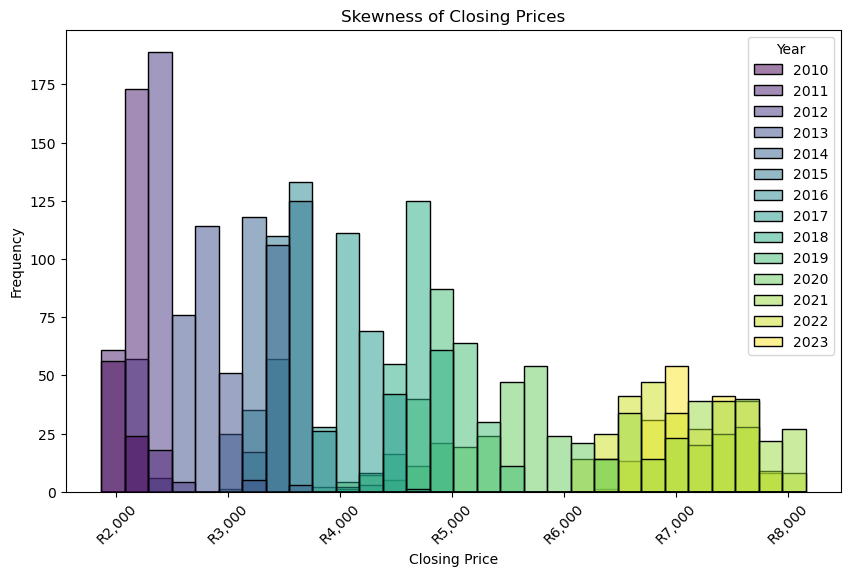

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(data=ds, x='Close', bins=30, hue='Year', palette='viridis', edgecolor='black')

plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: 'R{:,.0f}'.format(x)))


plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Skewness of Closing Prices')
plt.show()


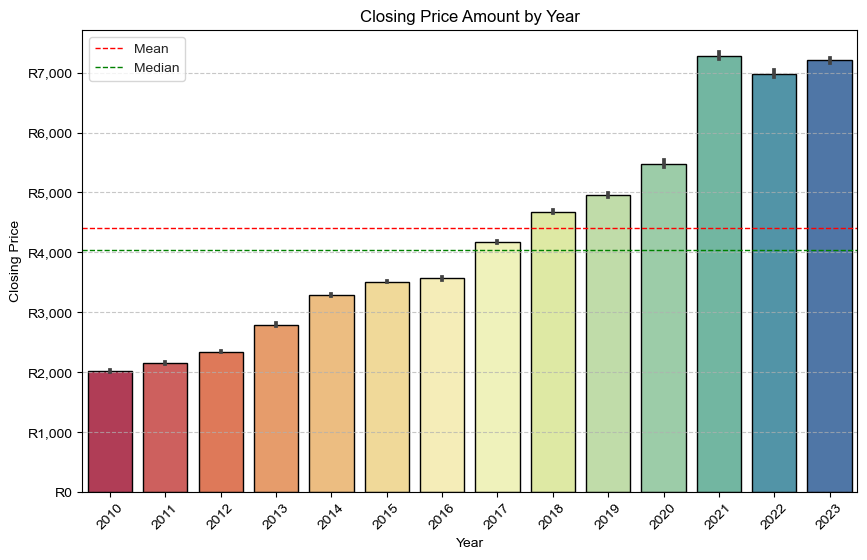

In [17]:
plt.figure(figsize=(10, 6))

# Plotting the bar plot
sns.barplot(data=ds, x='Year', y='Close', palette='Spectral', edgecolor='black')

plt.xticks(rotation=45)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: 'R{:,.0f}'.format(y)))

plt.axhline(ds["Close"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')

# Adding a line for median
plt.axhline(ds["Close"].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Amount by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.set_style("whitegrid")
plt.legend()
plt.show()


# Skewness Per year

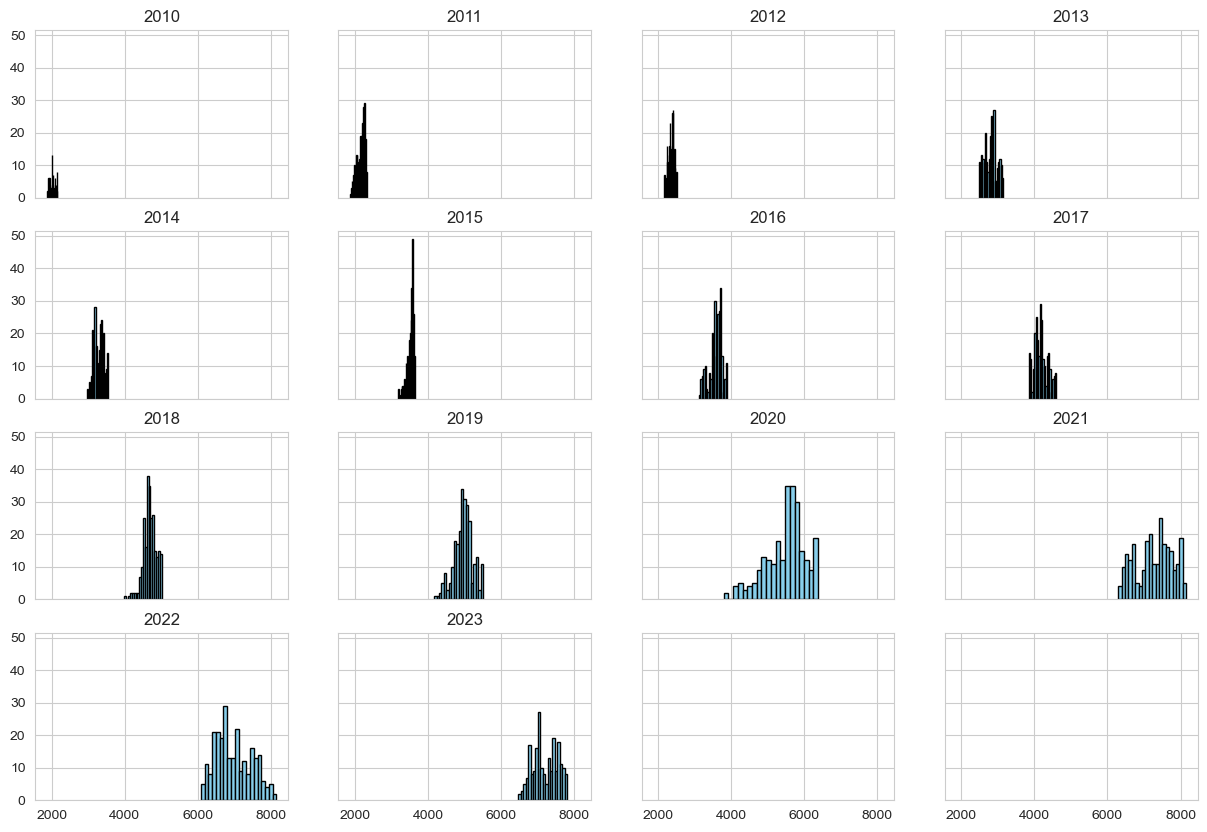

In [18]:
# Create subplots for each year
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10), sharex=True, sharey=True)


axes = axes.flatten()

for i, (year, data) in enumerate(ds.groupby('Year')):
    axes[i].hist(data['Close'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(year)
    axes[i].grid(True)

plt.show()


### Calculation for Skewness

In [19]:
standardizedDeviations = (ds["Close"] - ds["Close"].mean()) / overall_std

# Calculate the mean of cubed standardized deviations
meanCubedDeviations = np.mean(standardizedDeviations ** 3)

# Step 4: Divide by the cube of the standard deviation
skewness = meanCubedDeviations

print(skewness)

0.489301717849802


In the context of an index fund tracking the S&P 500, a positive skewness in the closing prices indicates that there is a tendency for the prices to have more frequent small increases but occasional large increases.

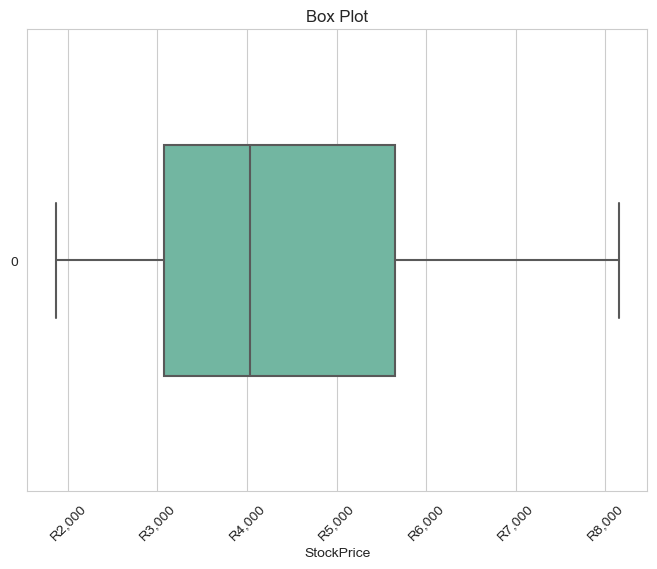

In [20]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))

# Same code as earlier to show the salaries on the x-axis
plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: 'R{:,.0f}'.format(x)))

sns.boxplot(data=ds["Close"], orient="h", width=0.5, palette="Set2", whis=1.5) #Using dataset
plt.xlabel("StockPrice")
plt.title("Box Plot")
plt.show()

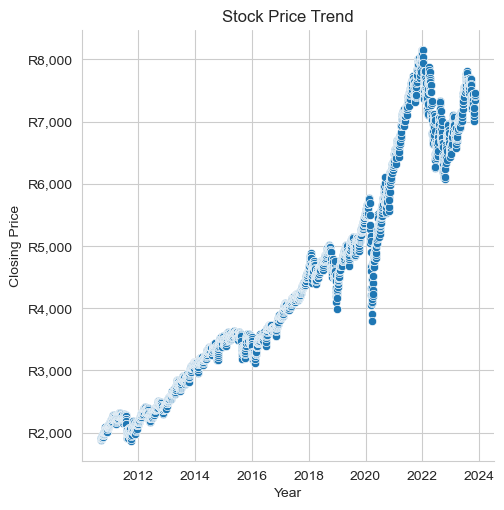

In [21]:
#plt.figure(figsize=(8, 6))
s = sns.relplot(data=ds, x="Date", y="Close")

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: 'R{:,.0f}'.format(y)))

plt.title("Stock Price Trend")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()

# Linear Regression


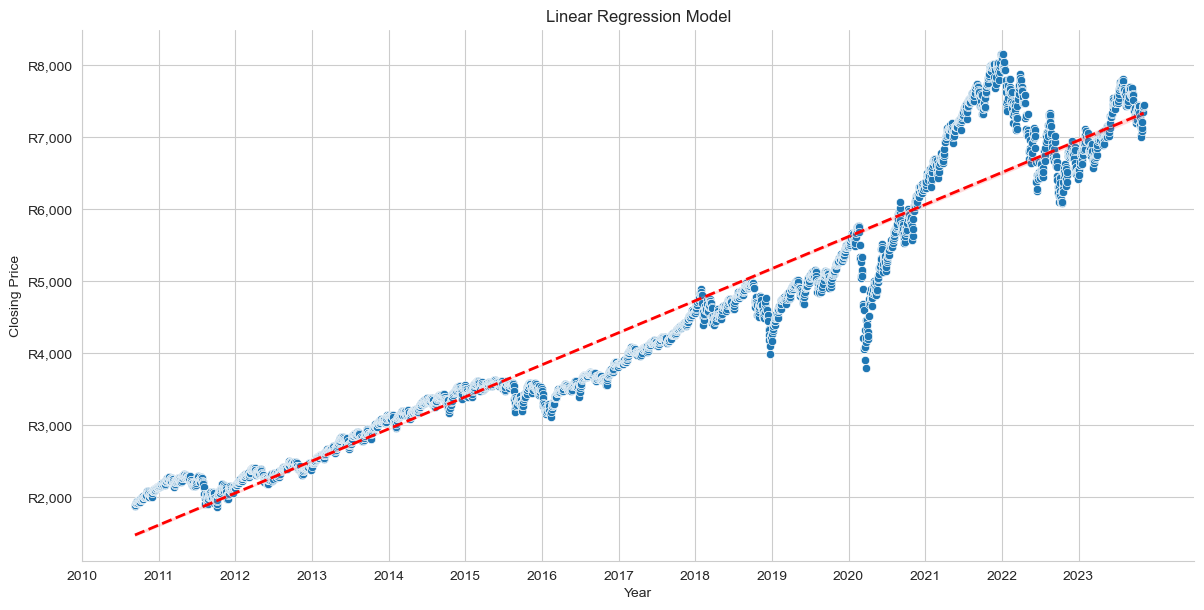

In [22]:
ds['Numeric_Date'] = mdates.date2num(ds['Date'])

#scatter plot
s = sns.relplot(data=ds, x="Numeric_Date", y="Close",  height=6, aspect=2)

#regression line
sns.regplot(data=ds, x="Numeric_Date", y="Close", scatter=False, color='red', line_kws={'ls': '--', 'lw': 2})

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: 'R{:,.0f}'.format(y)))
plt.xticks(ticks=mdates.YearLocator(1).tick_values(ds['Date'].min(), ds['Date'].max()), labels=range(2010, 2024))

plt.title("Linear Regression Model")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()


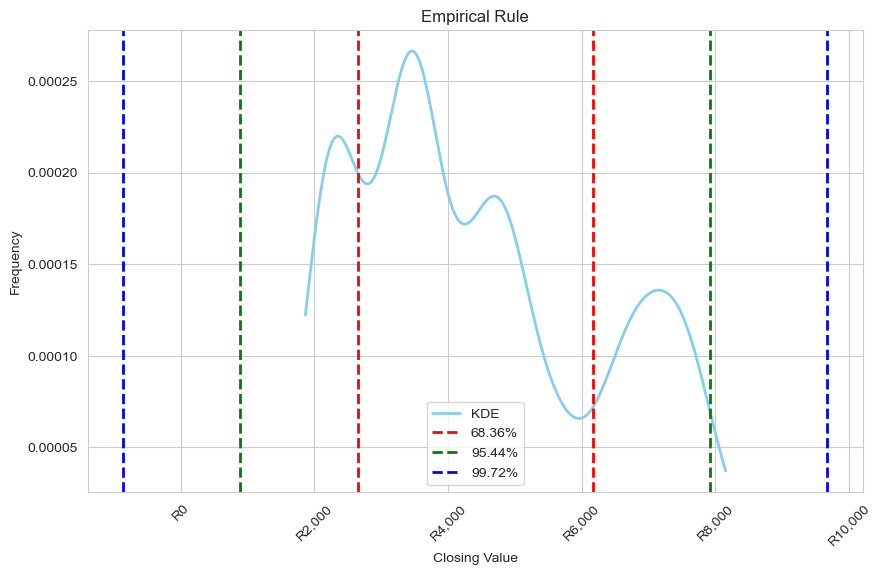

In [23]:
mean = ds["Close"].mean()
closing_values = ds["Close"].values

# Handle infinite values if necessary
closing_values = closing_values[~np.isinf(closing_values)]

# Define ranges for one, two, and three standard deviations (68.26, 95.44, 99.72 rule)
one_std_range = (mean - overall_std, mean + overall_std)
two_std_range = (mean - 2 * overall_std, mean + 2 * overall_std)
three_std_range = (mean - 3 * overall_std, mean + 3 * overall_std)

# Create a kernel density estimate (KDE) of the data
kde = gaussian_kde(closing_values)

# Plot the KDE curve
x_vals = np.linspace(closing_values.min(), closing_values.max(), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde(x_vals), color='skyblue', linewidth=2, label='KDE')

plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: 'R{:,.0f}'.format(x)))

# Plot lines for one, two, and three standard deviations
plt.axvline(x=one_std_range[0], color='red', linestyle='--', linewidth=2, label='68.36%')
plt.axvline(x=one_std_range[1], color='red', linestyle='--', linewidth=2)
plt.axvline(x=two_std_range[0], color='green', linestyle='--', linewidth=2, label='95.44%')
plt.axvline(x=two_std_range[1], color='green', linestyle='--', linewidth=2)
plt.axvline(x=three_std_range[0], color='blue', linestyle='--', linewidth=2, label='99.72%')
plt.axvline(x=three_std_range[1], color='blue', linestyle='--', linewidth=2)

# Add legend and labels
plt.legend()
plt.xlabel('Closing Value')
plt.ylabel('Frequency')
plt.title('Empirical Rule')

# Show plot
plt.grid(True)
plt.show()

# Covariance

In [24]:
meanVolume = ds["Volume"].mean()

#Calculate the deviations from means
cov1 = ds["Close"] - mean
cov2 = ds["Volume"] - meanVolume

covariance = (cov1 * cov2).sum() / (n-1)

print(covariance)

2609776288.687141


Shows a positive relationship between Volume and Close price

In [25]:
meanOpen = ds["Open"].mean()

#Calculate the deviations from means
cov1 = ds["Close"] - mean
cov2 = ds["Open"] - meanOpen

covariance = (cov1 * cov2).sum() / (n-1)

print(covariance)

3089456.3617169675


Shows a positive relationship between Open and CLose price

[*********************100%%**********************]  1 of 1 completed


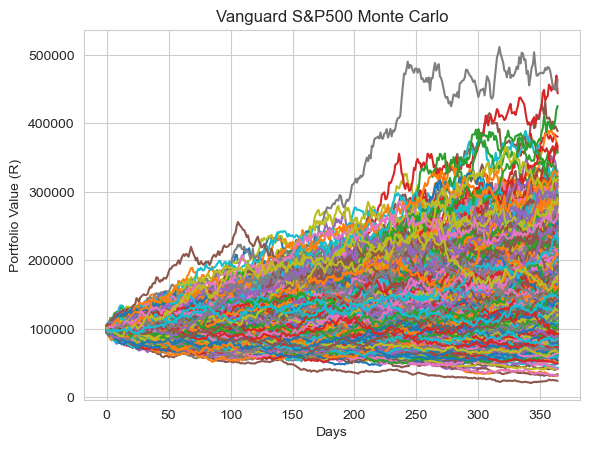

Mean final portfolio value: 121684.03318923348


In [26]:
def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    if isinstance(stockData, pd.Series):
        stockData = pd.DataFrame(stockData)
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov() if len(returns.columns) > 1 else returns.var()
    return returns, meanReturns, covMatrix

# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

stockList = ['VOO']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = dt.datetime(2010, 9, 7)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()

    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

# 100 days
Time = 365

hVaR = -historicalVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
hCVaR = -historicalCVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
pRet, pStd = portfolioPerformance(weights, meanReturns, covMatrix, Time)

InitialInvestment = 100000

def var_parametric(portfolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    
    if distribution == 'normal':
        VaR = norm.ppf(1-alpha/100)*portfolioStd - portfolioReturns
    elif distribution == 't-distribution':
        nu = dof
        VaR = np.sqrt((nu-2)/nu) * t.ppf(1-alpha/100, nu) * portfolioStd - portfolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return VaR.item() 

def cvar_parametric(portfolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    
    if distribution == 'normal':
        CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*portfolioStd - portfolioReturns
    elif distribution == 't-distribution':
        nu = dof
        xanu = t.ppf(alpha/100, nu)
        CVaR = -1/(alpha/100) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu) * portfolioStd - portfolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return CVaR.item()  # Convert array to scalar

normVaR = var_parametric(pRet, pStd)
normCVaR = cvar_parametric(pRet, pStd)

tVaR = var_parametric(pRet, pStd, distribution='t-distribution')
tCVaR = cvar_parametric(pRet, pStd, distribution='t-distribution')

mc_sims = 1000  
T = 365 

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns) 
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

portfolioStd = returns.std(axis=0).values.reshape(-1, 1)

initialPortfolio = 100000

for m in range(mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    dailyReturns = meanM + Z * portfolioStd.T  
    portfolio_sims[:, m] = np.cumprod(np.sum(weights * dailyReturns, axis=1) + 1) * initialPortfolio

mean_final_value = np.mean(portfolio_sims)

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value (R)')
plt.xlabel('Days')
plt.title('Vanguard S&P500 Monte Carlo')
plt.show()

print("Mean final portfolio value:", mean_final_value)